In [33]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import finpy_tse as fpy
import pytse_client as tse
import yfinance as yf
import ta 
import requests




import math as math

In [34]:
rsi_period1=14
rsi_period2=5

upper_band=70
lower_band=30

In [35]:


#fpy>>>>> index tepix

def index_kol(bars:int=9500):
    data=fpy.Get_CWI_History(ignore_date=True,double_date=True)
    data=data.iloc[:-bars:-1][::-1]
    data.index=data['Date']
    return(data)



symbol_data=index_kol()
symbol_data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...
2023-12-12,2023-12-12,2163400.0,2164380.0,2161240.0,2161267.0,2161266.6,5862611257
2023-12-13,2023-12-13,2161610.0,2161610.0,2158080.0,2158088.0,2158088.5,4607520016
2023-12-16,2023-12-16,2158840.0,2171820.0,2158840.0,2171823.0,2171823.2,4859395624


In [36]:
symbol_data['rsi_1'] = ta.momentum.RSIIndicator(symbol_data['Close'], window=rsi_period1).rsi()
symbol_data['rsi_2'] = ta.momentum.RSIIndicator(symbol_data['Close'], window=rsi_period2).rsi()

In [37]:
symbol_data

,Date,Open,High,Low,Close,Adj Close,Volume,rsi_1,rsi_2
Date,,,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624,NaN,NaN
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353,NaN,NaN
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115,NaN,NaN
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653,NaN,NaN
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174,NaN,0.000000
...,...,...,...,...,...,...,...,...,...
2023-12-12,2023-12-12,2163400.0,2164380.0,2161240.0,2161267.0,2161266.6,5862611257,74.991902,77.736099
2023-12-13,2023-12-13,2161610.0,2161610.0,2158080.0,2158088.0,2158088.5,4607520016,73.337048,71.167256
2023-12-16,2023-12-16,2158840.0,2171820.0,2158840.0,2171823.0,2171823.2,4859395624,75.819772,80.202282


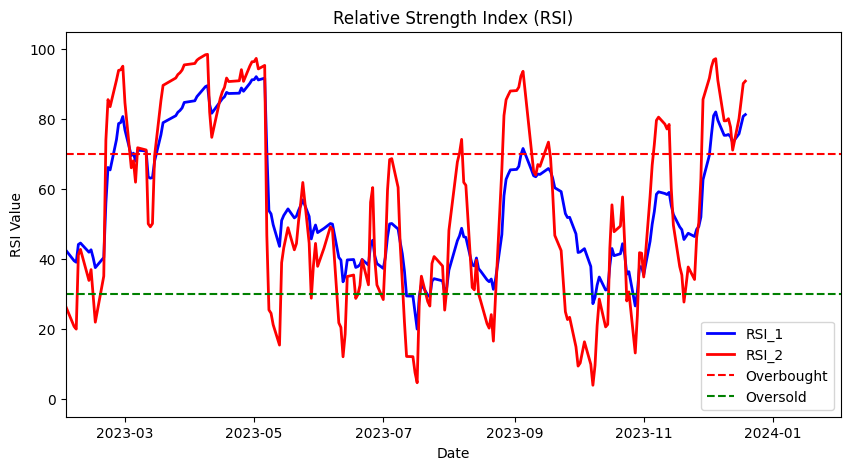

In [38]:
# تولید نمودار RSI
plt.figure(figsize=(10, 5))
plt.xlim([pd.to_datetime('2023-02-01'), pd.to_datetime('2024-02-02')])
plt.plot(symbol_data.index, symbol_data['rsi_1'], label='RSI_1', color='b', linewidth=2)
plt.plot(symbol_data.index, symbol_data['rsi_2'], label='RSI_2', color='r', linewidth=2)

# نشان دادن خطوط مرزی
plt.axhline(y=upper_band, color='r', linestyle='--', label='Overbought')
plt.axhline(y=lower_band, color='g', linestyle='--', label='Oversold')


# افزودن نام محورها و عنوان
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

# نمایش نمودار
plt.show()